In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
data_cleaned = df.dropna()

In [4]:
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence'] 
data_features = data_cleaned[features]

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_features)

C:\Users\kilar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kilar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kilar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kilar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

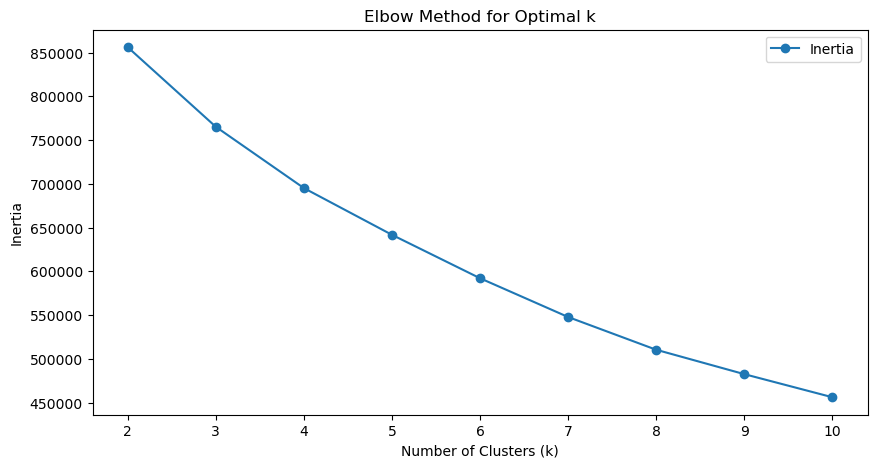

In [6]:
inertia = []
silhouette_scores = []
k_values = range(2, 11)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

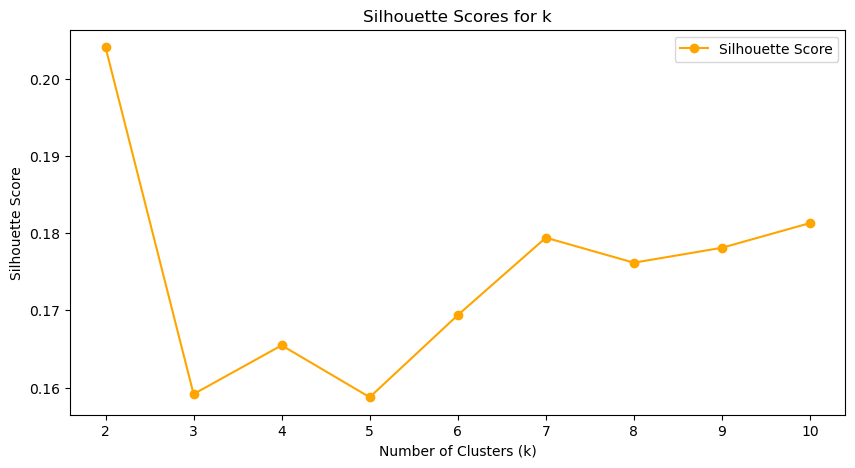

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k')
plt.legend()
plt.show()

In [8]:
optimal_k = 10 
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(scaled_features)


C:\Users\kilar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

In [9]:
data_cleaned['Cluster'] = kmeans_model.labels_

C:\Users\kilar\AppData\Local\Temp\ipykernel_45456\3875312982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = kmeans_model.labels_


In [10]:
silhouette_avg = silhouette_score(scaled_features, kmeans_model.labels_)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 10 clusters: 0.18129996732454295


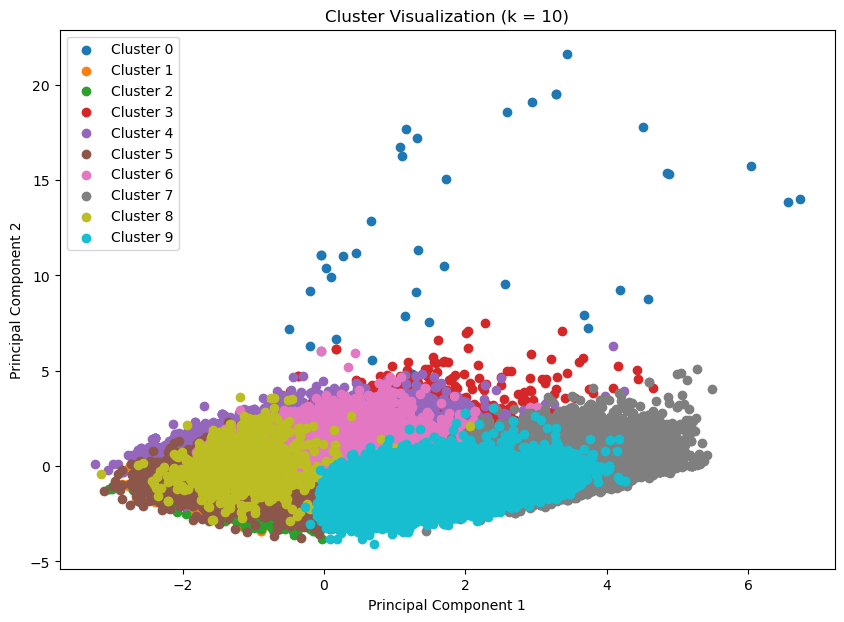

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_points = reduced_features[kmeans_model.labels_ == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title(f'Cluster Visualization (k = {optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [12]:
optimal_k = 7 
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(scaled_features)

C:\Users\kilar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7, random_state=42)

In [13]:
data_cleaned['Cluster'] = kmeans_model.labels_

C:\Users\kilar\AppData\Local\Temp\ipykernel_45456\3875312982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = kmeans_model.labels_


In [14]:
silhouette_avg = silhouette_score(scaled_features, kmeans_model.labels_)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 7 clusters: 0.17940584737178328


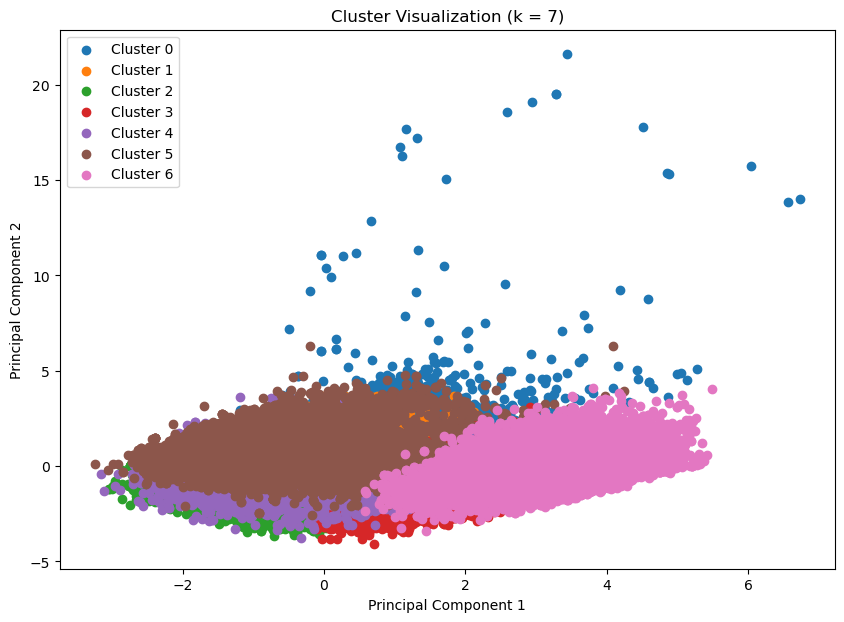

In [15]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_points = reduced_features[kmeans_model.labels_ == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title(f'Cluster Visualization (k = {optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
calinski = calinski_harabasz_score(scaled_features, kmeans_model.labels_)
davies_bouldin = davies_bouldin_score(scaled_features, kmeans_model.labels_)

print(f"Calinski-Harabasz Index: {calinski}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Calinski-Harabasz Index: 19431.826619420288
Davies-Bouldin Index: 2.043898586062339
